In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
file1 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/drag_010/state_007.nc')
file2 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/drag_010/WVELTH_007.nc')
t0 = 60 # Start from day 30
tn = len(file1.T) # End day
state1 = file1.isel(Y = range(1,10), T = range(t0,tn)) # Remove the boundary walls in y direction
state2 = file2.isel(Y = range(1,10), T = range(t0-1,tn-1)) # Remove the boundary walls in y direction

In [3]:
Hs = 10
Qf = 700

X = state1.X.data
x_dist = X / 1000
depth = state1.Z.data
#u0 = state1.U.data # dims = T, Z, Y, Xp1
#u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
#u = u_ymean.mean(0) # dims = Z, X
#u[u==0] = np.nan

vt = state2.WVELTH.data.mean(axis=(0,2))
u = state1.U.data
u.max(), u.mean()

(0.64643735, 0.04429102)

In [4]:
# Find the uppler and lower layer depth above the sill crest
def Layer(u):
    # Layer interface, zero velocity crossing point
    #l = np.empty(len(X)-1)
    h1 = np.empty(len(X)-2)
    for i in range(1,len(X)-1):
        l = np.where(u[:, i] < 0)[-1][0] - 1
        #h1[i-1] = -depth[l]
        # Calculate layer depth
        if l <= 9:
            h1[i-1] = -depth[l]+0.25
        elif l <= 19:
            h1[i-1] = -depth[l]+0.5
        elif l <= 29:
            h1[i-1] = -depth[l]+0.75
        elif l <= 39:
            h1[i-1] = -depth[l]+2
        elif l <= 49:
            h1[i-1] = -depth[l]+4
    return h1

Text(0, 0.5, 'Depth (m)')

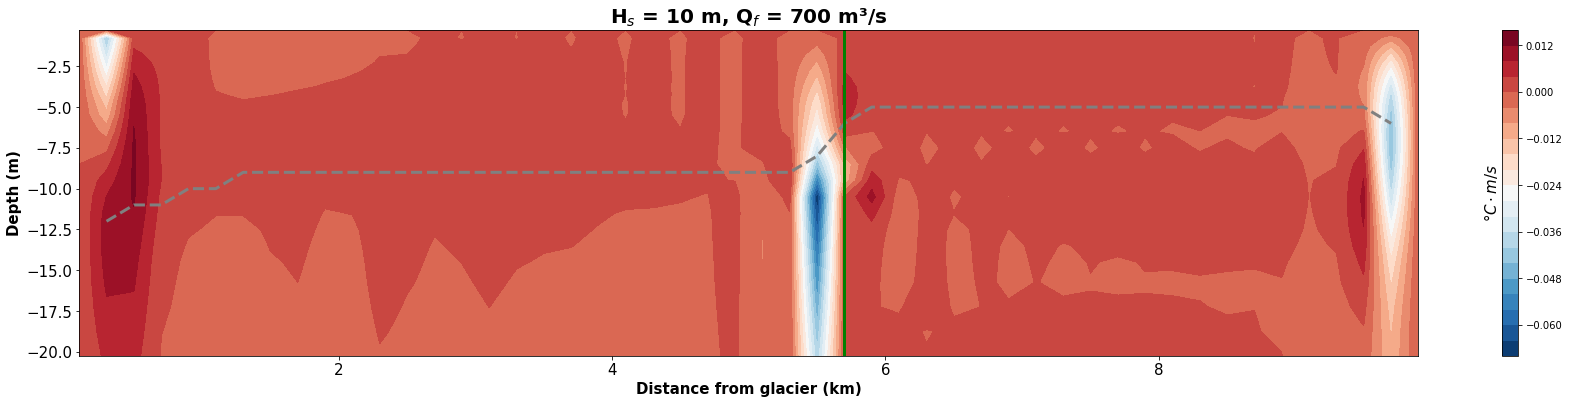

In [5]:
h1 = Layer(u)

fig_path = "/Users/weiyangbao/Documents/Model_outputs/HeatTransport/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/FrPseries/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig, ax = plt.subplots(figsize=(30,6)) 
ca = np.linspace(-0.068,0.016,25) # Contour range for viscous term
plt.contourf(x_dist,depth[:24], vt[:24,:], 20, cmap='RdBu_r')
plt.plot(x_dist[1:-1],-h1,color='gray', linestyle='--', lw=3)
ax.axvline(x_dist[28],color='g', lw=3)

import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

#cbar.ax.tick_params(labelsize=12)
cbar = plt.colorbar()
#print(cbar.values, cbar.vmax, cbar.vmin)
#cbar = plt.colorbar(ticks=np.linspace(-0.06,0.01,10))
#cbar.set_label(r'$\frac{(A_zu_z)_z}{uu_x}$', size=15, weight='bold', rotation=0)
cbar.set_label(r'$\degree C\cdot m/s$', size=15, weight='bold', labelpad=-80, y=0.5)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.title('H$_{s}$ = '  + str(Hs) + ' m, Q$_{f}$ = ' + str(Qf) + ' m\u00B3/s', size = 20, weight = 'bold')
ax.set_xlabel('Distance from glacier (km)', size = 15, weight = 'bold')
ax.set_ylabel('Depth (m)', size = 15, weight = 'bold')

#fig.savefig(fig_path + '/TH' + str(Hs) + '.png', dpi = 150, bbox_inches='tight')

(array([537.,  83.,  26.,  34.,  11.,  10.,   2.,   8.,   5.,   3.]),
 array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014,
        0.0016, 0.0018, 0.002 ], dtype=float32),
 <a list of 10 Patch objects>)

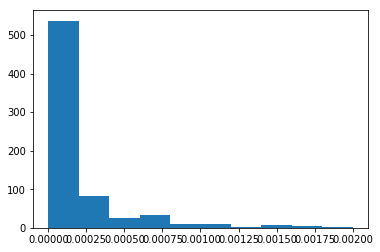

In [6]:
A = vt[:24,:]
plt.hist(A[~np.isnan(A)], range=(0,0.002))

In [7]:
np.linspace(-0.066,0.014,21)

array([-0.066, -0.062, -0.058, -0.054, -0.05 , -0.046, -0.042, -0.038,
       -0.034, -0.03 , -0.026, -0.022, -0.018, -0.014, -0.01 , -0.006,
       -0.002,  0.002,  0.006,  0.01 ,  0.014])